# Classification - Cancer Data Set

The objective is to test some differente classifiers looking for better features and exploring Hyperparameter Tunning.

The Dataset is part of "Wisconsin Diagnostic Breast Cancer" (WDBC) and it is available at UCI repository(http://archive.ics.uci.edu/ml/datasets.php). Details concerning data acquisition: [nesta página](http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html).

There are 30 features related to the following parameters:

- `radius`, `texture`,`perimeter`,`area`,`smoothness`,`compactness`, `concavity`,`concave points`,`symmetry`, `fractal dimension`

- `Diag` (`B` = Benign, `M` = Malign). 

Suffix `SD` stands for Standard Deviation, max values are accompanied by suffix `W`, whilst mean values have no suffix.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### EDA

In [2]:
df = pd.read_csv("wdbc.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID              569 non-null int64
Diag            569 non-null object
Radius          569 non-null float64
Texture         569 non-null float64
Perimeter       569 non-null float64
Area            569 non-null float64
Smooth          569 non-null float64
Compact         569 non-null float64
Concavity       569 non-null float64
ConcavePts      569 non-null float64
Simmetry        569 non-null float64
FD              569 non-null float64
RadiusSD        569 non-null float64
TextureSD       569 non-null float64
PerimeterSD     569 non-null float64
AreaSD          569 non-null float64
SmoothSD        569 non-null float64
CompactSD       569 non-null float64
ConcavitySD     569 non-null float64
ConcavePtsSD    569 non-null float64
SimmetrySD      569 non-null float64
FDSD            569 non-null float64
RadiusW         569 non-null float64
TextureW        569 non-null float64
PerimeterW

In [3]:
# inspeciona as primeiras 7 linhas da tabela
df.head(n=7)

,ID,Diag,Radius,Texture,Perimeter,Area,Smooth,Compact,Concavity,ConcavePts,...,RadiusW,TextureW,PerimeterW,AreaW,SmoothW,CompactW,ConcavityW,ConcavePtsW,SimmetryW,FDW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,109.00000,0.1127,74.00000,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [4]:
# Null Values
print(df.isnull().sum())

ID              0
Diag            0
Radius          0
Texture         0
Perimeter       0
Area            0
Smooth          0
Compact         0
Concavity       0
ConcavePts      0
Simmetry        0
FD              0
RadiusSD        0
TextureSD       0
PerimeterSD     0
AreaSD          0
SmoothSD        0
CompactSD       0
ConcavitySD     0
ConcavePtsSD    0
SimmetrySD      0
FDSD            0
RadiusW         0
TextureW        0
PerimeterW      0
AreaW           0
SmoothW         0
CompactW        0
ConcavityW      0
ConcavePtsW     0
SimmetryW       0
FDW             0
dtype: int64


In [5]:
# Undefined values
print(df.isna().sum())

ID              0
Diag            0
Radius          0
Texture         0
Perimeter       0
Area            0
Smooth          0
Compact         0
Concavity       0
ConcavePts      0
Simmetry        0
FD              0
RadiusSD        0
TextureSD       0
PerimeterSD     0
AreaSD          0
SmoothSD        0
CompactSD       0
ConcavitySD     0
ConcavePtsSD    0
SimmetrySD      0
FDSD            0
RadiusW         0
TextureW        0
PerimeterW      0
AreaW           0
SmoothW         0
CompactW        0
ConcavityW      0
ConcavePtsW     0
SimmetryW       0
FDW             0
dtype: int64


Checking columns and a few correlations

In [6]:
df.columns

Index(['ID', 'Diag', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smooth',
       'Compact', 'Concavity', 'ConcavePts', 'Simmetry', 'FD', 'RadiusSD',
       'TextureSD', 'PerimeterSD', 'AreaSD', 'SmoothSD', 'CompactSD',
       'ConcavitySD', 'ConcavePtsSD', 'SimmetrySD', 'FDSD', 'RadiusW',
       'TextureW', 'PerimeterW', 'AreaW', 'SmoothW', 'CompactW', 'ConcavityW',
       'ConcavePtsW', 'SimmetryW', 'FDW'],
      dtype='object')

In [7]:
atributos = ["Diag", "Perimeter", "Area", "Compact", "Simmetry", "Texture", "AreaW", "SmoothW"]
df_view = df[atributos]
#df_view = df[df.columns]
df_view.corr()

,Perimeter,Area,Compact,Simmetry,Texture,AreaW,SmoothW
Perimeter,1.000000,0.986507,0.098709,-0.097831,0.329533,0.941550,0.000419
Area,0.986507,1.000000,0.076765,-0.096938,0.321086,0.959213,-0.002280
Compact,0.098709,0.076765,1.000000,0.006421,0.140073,0.088754,0.075275
Simmetry,-0.097831,-0.096938,0.006421,1.000000,-0.032590,-0.100657,-0.046680
Texture,0.329533,0.321086,0.140073,-0.032590,1.000000,0.343546,-0.005302
AreaW,0.941550,0.959213,0.088754,-0.100657,0.343546,1.000000,-0.001021
SmoothW,0.000419,-0.002280,0.075275,-0.046680,-0.005302,-0.001021,1.000000


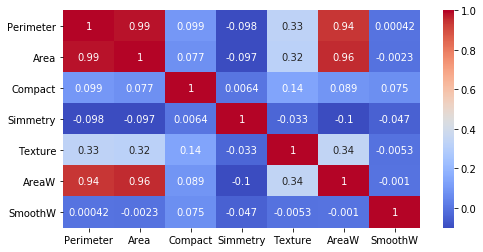

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(df_view.corr(), annot=True, cmap='coolwarm')
plt.show()

Checking the distribution of each label for a few features available. Important step to understand which features may hold a good amount of information to explain variance for each label. 

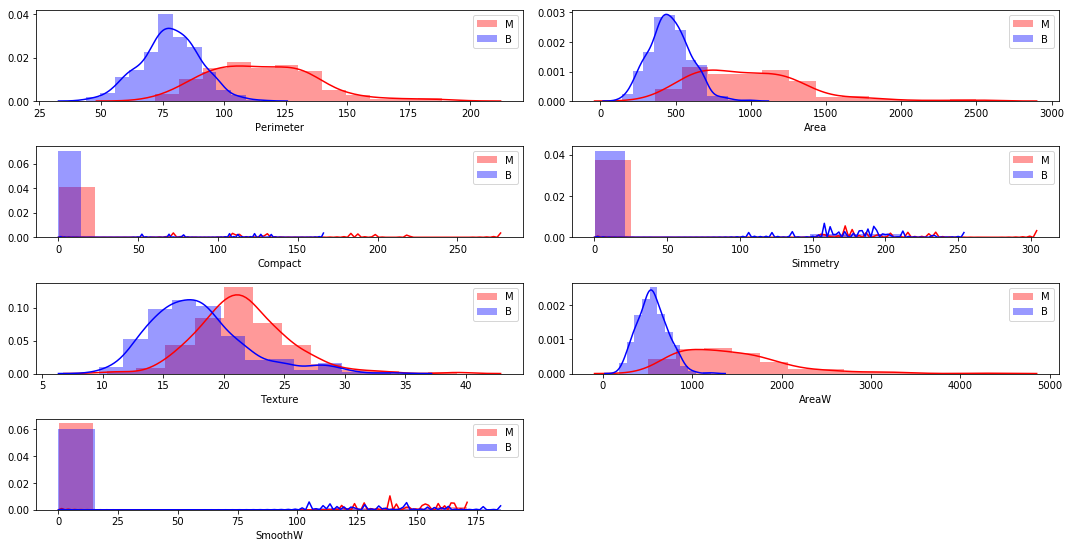

In [9]:
df_m = df[df['Diag'] == 'M']
df_b = df[df['Diag'] == 'B']
atributos = ["Perimeter", "Area", "Compact", "Simmetry", "Texture", "AreaW", "SmoothW"]

bins = 12
plt.figure(figsize=(15,30))
rows = int(len(df.columns)/2)
for i, col in enumerate(atributos):
    plt.subplot(rows, 2, i+1)
    sns.distplot(df_m[col], bins=bins, color='red', label='M');
    sns.distplot(df_b[col], bins=bins, color='blue', label='B');
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Through Seaborn package we can further understand pair-wise interactions between features.

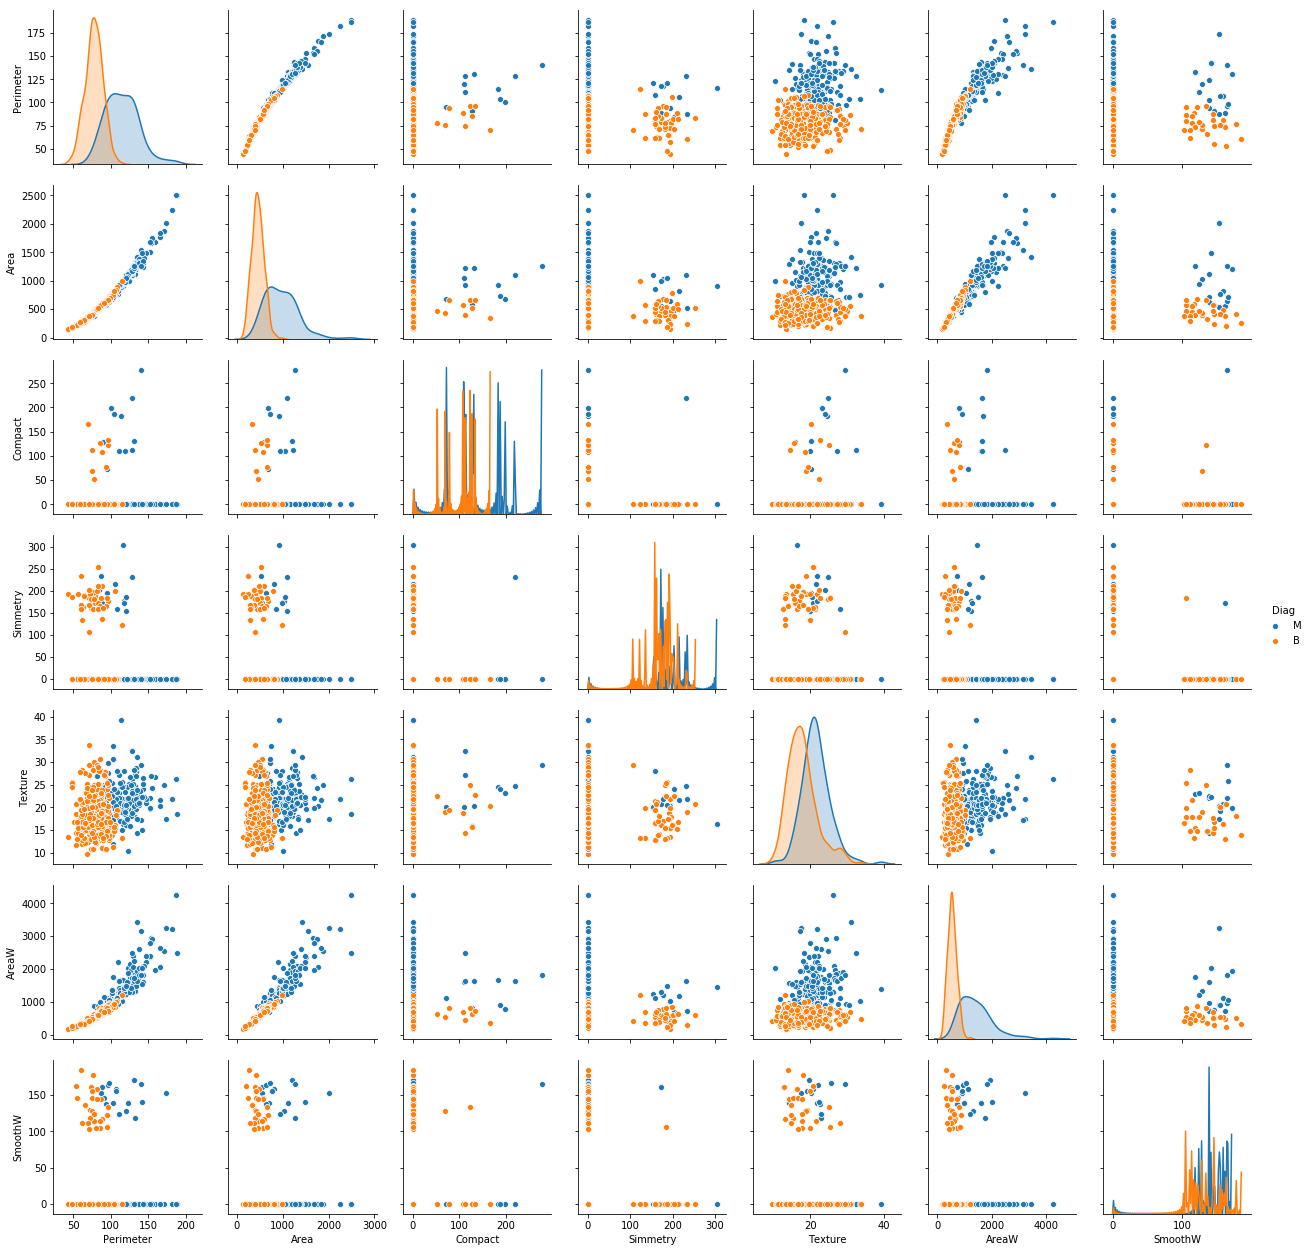

In [10]:
# matriz de dispersão usando o pacote seaborn
sns.pairplot(df_view, hue="Diag");

#An alternative would be Pandas/Matplolib
#pd.plotting.scatter_matrix(df_view, alpha=0.8, figsize=(15,15), diagonal='kde');

From medical literature it is known that a classifier using only `Texture`, `AreaW`, and `SmoothW` would present good score already.

At first we may start Encoding the label variable as required by some classifiers.

In [11]:
df_clean = df.replace({"Diag":{'B':0, 'M':1}})

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

atributos.remove('Diag')
X = df_clean.loc[:, atributos]
y = df_clean.loc[:, 'Diag']

ValueError: list.remove(x): x not in list

Normalization so each column presents a null mean and unitarian 'std'. Algorithms as KNN that are distance-based require that the features are scaled to performer adequately.

We will be investigating models based on three algorithms implemented via Scikit Learn: logistic regression, k nearest neighbors and decision trees.

In [ ]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Tasks

1. Finding the best `n_neighbors` parameter for the KNN model.
2. Compare `LogisticRegressionCV` model investigating both `L1-norm` and `L2-norm` while fine tunning `C` parameter that the determines how much the non-null coefficients will be penalize. Comparing both models at the end.
3. Build a DecisionTreeClassifier tunning `max_depth` and `min_samples_leaf` using Cross Validation to find the best combination of those parameters.
4. Assess models performance in the test set and discuss.

# Solution

**A few considerations on the notebook at hand.**

- The presented heatmap may mislead the reader once its scale does not range from -1 to 1, but from the lowest value of correlation. Thus, light colors do not represent close to zero correlation, but actually weak/medium positive correlations.


In [ ]:
df_clean[atributos].corr().iloc[:,0]

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_1.ID[:,np.newaxis])
scaler1

X_train1 = scaler1.transform(X_1.ID[:,np.newaxis])
X_test1 = scaler1.transform(X_2.ID[:,np.newaxis])

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train1[:,0][:,np.newaxis], y_train);

In [ ]:
np.mean(cross_val_score(knn1,X_test,y_test,cv=5,scoring='f1'))

In [ ]:
np.mean(cross_val_score(knn1,X_test1,y_test,cv=5,scoring='f1'))

In [ ]:
def first_exe(XX,yy):
    #split sets
    X_1, X_2, y_train, y_test = train_test_split(
        XX, yy, test_size = 0.25, random_state = 0)
    
    
    #scalling variables
    scaler = preprocessing.StandardScaler().fit(X_1)
    X_train = scaler.transform(X_1)
    X_test = scaler.transform(X_2)                            

    #Criar Classificador KNN
    knn_clf = KNeighborsClassifier()
        
    parameters = {'n_neighbors':list(range(1,20))}
    clf_final = GridSearchCV(knn_clf, param_grid=parameters)
    clf_final.fit(X_train,y_train)
        
    print('\nBest Scoring parameter:',clf_final.best_params_)
    
    cv_sc = np.mean(cross_val_score(clf_final, X_train, y_train,cv=5))
    
    print('\nThe mean CV score for the final classifier is: {:.4f}'.format(cv_sc))

In [ ]:
at = df.columns.difference(['Diag','ID'])

X = df_clean.loc[:, at]
y = df_clean.loc[:, 'Diag']